In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(xtrain, _),(xtest, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
xtrain = xtrain.astype('float32')/255.0
xtest = xtest.astype('float32')/255.0
xtrain = xtrain.reshape((len(xtrain),np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest),np.prod(xtest.shape[1:])))
print(xtrain.shape,xtest.shape)

(60000, 784) (10000, 784)


In [39]:
#del auto_encoder

In [5]:
encoding_dims = 32

In [6]:
#autoencoders model
input = tf.keras.layers.Input(shape = (784,))
encoding_layer = tf.keras.layers.Dense(encoding_dims,activation = 'relu')(input)
decoding_layer = tf.keras.layers.Dense(784,'sigmoid')(encoding_layer)

In [7]:
auto_encoder = tf.keras.Model(input,decoding_layer)

In [8]:
#Encoder
encoder = tf.keras.Model(input,encoding_layer)

In [9]:
#Decoder
encoded_output = tf.keras.layers.Input((encoding_dims,))
decod_layer = auto_encoder.layers[-1]

decoder = tf.keras.Model(encoded_output,decod_layer(encoded_output))

In [10]:
auto_encoder.compile(optimizer='adam',loss='binary_crossentropy')

In [11]:
auto_encoder.fit(xtrain,xtrain,batch_size = 32,epochs = 20,validation_data = (xtest,xtest))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1612 - val_loss: 0.1131
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1041 - val_loss: 0.0969
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0964 - val_loss: 0.0940
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0950 - val_loss: 0.0934
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0944 - val_loss: 0.0930
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0941 - val_loss: 0.0927
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0939 - val_loss: 0.0925
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0937 - val_loss: 0.0925
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.093

In [12]:
encod_img = encoder.predict(xtest)
decod_img = decoder.predict(encod_img)

313/313 [==============================] - 1s 2ms/step


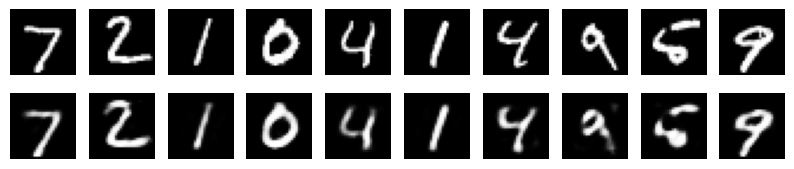

In [24]:
plt.figure(figsize = (10,2))
n = 10
for i in range (n):
  plt.subplot(2,n,i+1)
  img = xtest[i]
  plt.imshow(img.reshape(28,28),cmap = 'gray')
  plt.axis('off')
  plt.subplot(2,n,i+n+1)
  pred_img = decod_img[i]
  plt.imshow(pred_img.reshape(28,28),cmap = 'gray')
  plt.axis('off')